<a href="https://colab.research.google.com/github/samuelpolontalo/Corn-Maize-Leaf-Diseases/blob/main/Corn_Maize_Leaf_Diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# from google.colab import files
# files.upload()

In [3]:
# Install kaggle library 
!pip install -q kaggle
# Make ".kaggle" directory in root directory
!mkdir -p ~/.kaggle
# Copy the API token to the kaggle directory
!cp kaggle.json ~/.kaggle/
# Check the directory
!ls ~/.kaggle
# Adjust access permissions
!chmod 600 /root/.kaggle/kaggle.json

# WTF reinstall kaggle
!pip uninstall -y kaggle
!pip install kaggle

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Found existing installation: kaggle 1.5.12
Uninstalling kaggle-1.5.12:
  Successfully uninstalled kaggle-1.5.12
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 58 kB 5.1 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73050 sha256=efc6a8f5924a09961b7a895404b6a135d0ef5ac9203bde22d6498f3280d62879
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle


In [4]:
os.environ["KAGGLE_USERNAME"] = 'samuelpolontalotest'
os.environ["KAGGLE_KEY"] = '9be16db0455dd105d8abf50b24736291'

In [5]:
!mkdir downloaded-data

In [6]:
!kaggle datasets download -d smaranjitghose/corn-or-maize-leaf-disease-dataset

 99% 159M/161M [00:11<00:00, 17.0MB/s]
100% 161M/161M [00:11<00:00, 14.3MB/s]


In [7]:
!mkdir {"extracted-data"}

In [8]:
path_to_zip_file = '/content/corn-or-maize-leaf-disease-dataset.zip'

In [9]:
directory_to_extract_to = '/content/extracted-data'

In [10]:
import zipfile
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [11]:
os.listdir('/content/extracted-data/data')

['Healthy', 'Gray_Leaf_Spot', 'Blight', 'Common_Rust']

In [12]:
print (len(os.listdir('/content/extracted-data/data/Blight')))
print (len(os.listdir('/content/extracted-data/data/Common_Rust')))
print (len(os.listdir('/content/extracted-data/data/Gray_Leaf_Spot')))
print (len(os.listdir('/content/extracted-data/data/Healthy')))

1146
1306
574
1162


In [13]:
# membuat nama directori
base_dir = '/content/extracted-data/data'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

# membuat direktori train dan validation
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [14]:
# membuat direktori untuk setiap klasifikasi
Blight_dir = os.path.join(base_dir,'Blight')
Common_Rust_dir = os.path.join(base_dir, 'Common_Rust')
Gray_Leaf_Spot_dir = os.path.join(base_dir,'Gray_Leaf_Spot')
Healthy_dir = os.path.join(base_dir, 'Healthy')

In [15]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [16]:
# memecah direktori Blight menjadi data train dan data validation
val_Blight_dir, train_Blight_dir = train_test_split(os.listdir(Blight_dir), test_size = 0.8)
val_Common_Rust_dir, train_Common_Rust_dir = train_test_split(os.listdir(Common_Rust_dir), test_size = 0.8)
val_Gray_Leaf_Spot_dir, train_Gray_Leaf_Spot_dir = train_test_split(os.listdir(Gray_Leaf_Spot_dir), test_size = 0.8)
val_Healthy_dir, train_Healthy_dir = train_test_split(os.listdir(Healthy_dir), test_size = 0.8)

In [17]:
len(train_Blight_dir)/len(os.listdir('/content/extracted-data/data/Blight'))

0.800174520069808

In [18]:
train_Blight = os.path.join(train_dir, 'Blight')
train_Common_Rust = os.path.join(train_dir, 'Common_Rust')
train_Gray_Leaf_Spot = os.path.join(train_dir, 'Gray_Leaf_Spot')
train_Healthy = os.path.join(train_dir, 'Healthy')

if not os.path.exists(train_Blight):
  os.mkdir(train_Blight)
if not os.path.exists(train_Common_Rust):
  os.mkdir(train_Common_Rust)
if not os.path.exists(train_Gray_Leaf_Spot):
  os.mkdir(train_Gray_Leaf_Spot)
if not os.path.exists(train_Healthy):
  os.mkdir(train_Healthy)

In [19]:
# membuat direktori ruangan rapi pada direktori data validating
val_Blight = os.path.join(validation_dir, 'Blight')
val_Common_Rust = os.path.join(validation_dir, 'Common_Rust')
val_Gray_Leaf_Spot = os.path.join(validation_dir, 'Gray_Leaf_Spot')
val_Healthy = os.path.join(validation_dir, 'Healthy')

if not os.path.exists(val_Blight):
  os.mkdir(val_Blight)
if not os.path.exists(val_Common_Rust):
  os.mkdir(val_Common_Rust)
if not os.path.exists(val_Gray_Leaf_Spot):
  os.mkdir(val_Gray_Leaf_Spot)
if not os.path.exists(val_Healthy):
  os.mkdir(val_Healthy)

In [20]:
import shutil

for i in train_Blight_dir:
  shutil.copy(os.path.join(Blight_dir, i), os.path.join(train_Blight, i))
for i in train_Common_Rust_dir:
  shutil.copy(os.path.join(Common_Rust_dir,i), os.path.join(train_Common_Rust,i))
for i in train_Gray_Leaf_Spot_dir:
  shutil.copy(os.path.join(Gray_Leaf_Spot_dir, i), os.path.join(train_Gray_Leaf_Spot, i))
for i in train_Healthy_dir:
  shutil.copy(os.path.join(Healthy_dir,i), os.path.join(train_Healthy,i))

In [21]:
for i in val_Blight_dir:
  shutil.copy(os.path.join(Blight_dir, i), os.path.join(val_Blight,i))
for i in val_Common_Rust_dir:
  shutil.copy(os.path.join(Common_Rust_dir,i), os.path.join(val_Common_Rust,i))
for i in val_Gray_Leaf_Spot_dir:
  shutil.copy(os.path.join(Gray_Leaf_Spot_dir, i), os.path.join(val_Gray_Leaf_Spot,i))
for i in val_Healthy_dir:
  shutil.copy(os.path.join(Healthy_dir,i), os.path.join(val_Healthy,i))

In [22]:
print ('jumlah data train Blight adalah ',len(os.listdir('/content/extracted-data/data/train/Blight')))
print ('jumlah data train Common_Rust adalah ',len(os.listdir('/content/extracted-data/data/train/Common_Rust')))
print ('jumlah data train Gray_Leaf_Spot adalah ',len(os.listdir('/content/extracted-data/data/train/Gray_Leaf_Spot')))
print ('jumlah data train Healthy adalah ',len(os.listdir('/content/extracted-data/data/train/Healthy')))

jumlah data train Blight adalah  917
jumlah data train Common_Rust adalah  1045
jumlah data train Gray_Leaf_Spot adalah  460
jumlah data train Healthy adalah  930


In [23]:
print ('jumlah data val Blight adalah ',len(os.listdir('/content/extracted-data/data/val/Blight')))
print ('jumlah data val Common_Rust adalah ',len(os.listdir('/content/extracted-data/data/val/Common_Rust')))
print ('jumlah data val Gray_Leaf_Spot adalah ',len(os.listdir('/content/extracted-data/data/val/Gray_Leaf_Spot')))
print ('jumlah data val Healthy adalah ',len(os.listdir('/content/extracted-data/data/val/Healthy')))

jumlah data val Blight adalah  229
jumlah data val Common_Rust adalah  261
jumlah data val Gray_Leaf_Spot adalah  114
jumlah data val Healthy adalah  232


In [24]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [25]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 3352 images belonging to 4 classes.
Found 836 images belonging to 4 classes.


In [26]:
# membuat model 
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(4, activation= 'softmax')
])

In [27]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

In [28]:
from datetime import datetime
start_time = datetime.now()


history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =1
)


end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Epoch 1/20
25/25 [==============================] - 21s 400ms/step - loss: 1.0708 - accuracy: 0.5175 - val_loss: 0.6530 - val_accuracy: 0.7250
Epoch 2/20
25/25 [==============================] - 9s 350ms/step - loss: 0.6471 - accuracy: 0.7212 - val_loss: 0.6574 - val_accuracy: 0.8062
Epoch 3/20
25/25 [==============================] - 8s 317ms/step - loss: 0.5017 - accuracy: 0.8043 - val_loss: 0.5120 - val_accuracy: 0.8062
Epoch 4/20
25/25 [==============================] - 8s 336ms/step - loss: 0.4644 - accuracy: 0.8175 - val_loss: 0.3685 - val_accuracy: 0.8188
Epoch 5/20
25/25 [==============================] - 8s 313ms/step - loss: 0.4995 - accuracy: 0.7937 - val_loss: 0.4324 - val_accuracy: 0.8188
Epoch 6/20
25/25 [==============================] - 8s 306ms/step - loss: 0.4159 - accuracy: 0.8313 - val_loss: 0.3409 - val_accuracy: 0.8625
Epoch 7/20
25/25 [==============================] - 8s 332ms/step - loss: 0.3359 - accuracy: 0.8600 - val_loss: 0.2895 - val_accuracy: 0.8813
Epoch

Text(0.5, 1.0, 'Training and Validation Accuracy')

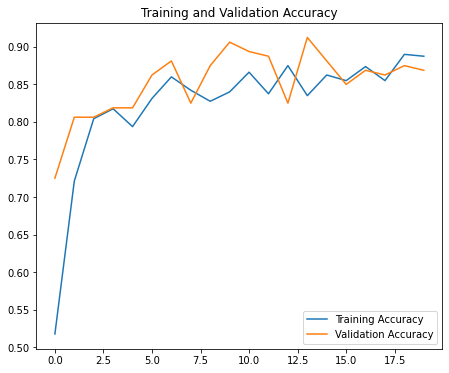

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

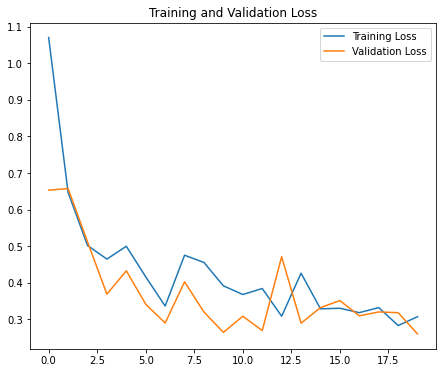

In [30]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Silahkan masukan foto sel yang akan diuji


Saving bacterial-leaf-streak-of-maize-maize-1583423390.jpg to bacterial-leaf-streak-of-maize-maize-1583423390 (1).jpg
1/1 [==============================] - 0s 19ms/step
bacterial-leaf-streak-of-maize-maize-1583423390.jpg
Common rust


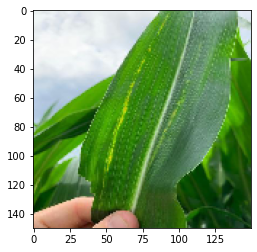

In [32]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
import tensorflow as tf
%matplotlib inline

print("Silahkan masukan foto sel yang akan diuji")
uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = tf.keras.utils.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = tf.keras.utils.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('Blight')
  elif classes[0,1]!=0:
    print('Common rust')
  elif classes[0,2]!=0:
    print('Gray leaf spot')
  elif classes[0,3]!=0:
    print('Healthy')